## Merge to 1 file with 2013 as refrence

In [ ]:
import pandas as pd
features_file = 'Feature_comparison.xlsx'
features_data = pd.read_excel(features_file)

base_year = 2013
mapping_dict = {}
for year in features_data.columns[0:-1]:
    if year != base_year:
        year_mapping = dict(zip(features_data[year], features_data[base_year]))
        year_mapping = {k: v for k, v in year_mapping.items() if pd.notna(k)}
        mapping_dict[year] = year_mapping

mapping_dict

In [ ]:
import pandas as pd
import os

directory = r'./Yearly' 
files = [
    '2009.csv', 
    '2010.csv', '2011.csv', '2012.csv', 
    '2013.csv',
    '2014.csv', '2015.csv', '2016.csv', '2017.csv',
    '2018.xlsx', '2019.csv', '2020.xlsx', '2021.csv'
]
reference_df = pd.read_csv(os.path.join(directory, '2013.csv'))
reference_columns = reference_df.columns.tolist()
dataframes = []
for file in files:
    file_path = os.path.join(directory, file)
    year = int(file[:4])
    if file.endswith('.csv'):
        df = pd.read_csv(file_path)
    elif file.endswith('.xlsx'):
        df = pd.read_excel(file_path)
    
    if year in mapping_dict:
        for original_col, standard_col in mapping_dict[year].items():
            if original_col in df.columns:
                if standard_col in df.columns:
                    df[standard_col] = df[standard_col].combine_first(df[original_col])
                else:
                    df.rename(columns={original_col: standard_col}, inplace=True)
    
    for col in reference_columns:
        if col not in df.columns:
            df[col] = None
    
    df = df[reference_columns]
    dataframes.append(df)

merged_df = pd.concat(dataframes, ignore_index=True)

# some feature handling ( consistency across different years based )
merged_df.loc[merged_df['Year'].isin([2019, 2020, 2021]), 'Self'] = merged_df['Self'].map({0: 2, 1: 1})
merged_df['CoAge'] = merged_df['CoAge'].replace(98, 998)

output_file = os.path.join(directory, 'merged_data.csv')
merged_df.to_csv(output_file, index=False)

print(f"Merged file saved to: {output_file}")

C:\Users\Matin\AppData\Local\Temp\ipykernel_33208\4206836889.py:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  merged_df = pd.concat(dataframes, ignore_index=True)


Merged file saved to: ./Yearly\merged_data.csv


## Imports and Methods and important variables

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

missing_indicators = {
    'Year': [], 
    'Loan Number': [], 
    'FHLBankID': [], 
    'Program': [], 
    'FIPSStateCode': [],
    'FIPSCountyCode': [], 
    # 'MSA': [99999], 
    'MSA': [],
    'FeatureID': [], 
    'Tract': [], 
    'MinPer': [], 
    'TraMedY': [],
    'LocMedY': [], 
    'Tractrat': [],
    'Income': [], 
    'CurAreY': [], 
    'IncRat': [], 
    'UPB': [], 
    'LTV': [],
    'MortDate': [],
    'AcquDate': [], 
    'Purpose': [], 
    'Coop': [], 
    'Product': [], 
    'FedGuar': [], 
    'Term': [],
    'AmorTerm': [998], 
    'FHFBID': [], 
    'Seller': [], 
    'SellCity': [], 
    'SellSt': [], 
    'SellType': [],
    'NumBor': [], 
    'First': [2], 
    'CICA': [], 
    'BoRace': [], 
    'CoRace': [], 
    'BoGender': [], 
    'CoGender': [],
    'BoAge': [999, 99], 
    'CoAge': [999, 99], 
    'Occup': [], 
    'NumUnits': [], 
    'Bed1': [],
    'Bed2': [], 
    'Bed3': [], 
    'Bed4': [],
    'Aff1': [], 
    'Aff2': [], 
    'Aff3': [], 
    'Aff4': [], 
    # 'Rent1': [9999999999], 
    # 'Rent2': [9999999999],
    # 'Rent3': [9999999999], 
    # 'Rent4': [9999999999],
    # 'RentUt1': [9999999999], 
    # 'RentUt2': [9999999999], 
    # 'RentUt3': [9999999999], 
    # 'RentUt4': [9999999999],
    'Rent1': [], 
    'Rent2': [],
    'Rent3': [], 
    'Rent4': [],
    'RentUt1': [], 
    'RentUt2': [], 
    'RentUt3': [], 
    'RentUt4': [], 
    'Geog': [], 
    'Rate': [], 
    'Amount': [],
    'Front': [], 
    'Back': [], 
    'Borrower Credit Score': [9], 
    'Co-Borrower Credit Score': [],
    'PMI': [], 
    'Self': [0], 
    'PropType': [], 
    'ArmIndex': [], 
    'ArmMarg': [99999], 
    'PrepayP': ['12/31/9999', '9999-12-31 00:00:00', '9999-12-31'], 
    'BoEth': [3],
    'Race2': [6], 
    'Race3': [6], 
    'Race4': [6], 
    'Race5': [6], 
    'CoEth': [3], 
    'Corace2': [6], 
    'Corace3': [6],
    'Corace4': [6], 
    'Corace5': [6], 
    'HOEPA': [], 
    'LienStatus': [], 
    'SpcHsgGoals': [],
    'FedFinStbltyPlan': [], 
    'AcqTyp': [], 
    'GSEREO': [],
}

def missing_percentage(df, num_subplots = 2):
    missing_percentages = {}
    for column in df.columns:
        total_missing_explicit = 0
        if column in missing_indicators:
            total_missing_explicit = df[column].isin(missing_indicators[column]).sum()
        
        total_missing_nan = df[column].isna().sum()
        total_missing = total_missing_explicit + total_missing_nan
        total_rows = len(df[column])
        
        missing_percentages[column] = (total_missing / total_rows) * 100

    for column, percentage in missing_percentages.items():
        if percentage != 0:
            print(f"{column}: {percentage:.2f}% missing")

    filtered_missing = {col: perc for col, perc in missing_percentages.items()}
    df_missing = pd.DataFrame(filtered_missing.items(), columns=["Column", "Missing Percentage"])
    # df_missing.to_csv("missing_percentages.csv", index=False)

    # Filter out columns with missing values
    df_missing_filtered = df_missing[df_missing["Missing Percentage"] > 0]

    if (num_subplots > 1) :
        split_size = len(df_missing_filtered) // num_subplots
        # Create compact horizontal bar plots
        for i in range(num_subplots):
            start_idx = i * split_size
            end_idx = (i + 1) * split_size if i < num_subplots - 1 else len(df_missing_filtered)
            subset = df_missing_filtered.iloc[start_idx:end_idx]

            plt.figure(figsize=(6, max(len(subset) / 4, 4)))  # Reduce height for compactness
            colors = plt.cm.coolwarm(np.linspace(0, 1, len(subset)))
            bars = plt.barh(subset["Column"], subset["Missing Percentage"], color=colors, height=0.5)  # Horizontal bars
            
            for bar in bars:
                xval = bar.get_width()
                plt.text(xval, bar.get_y() + bar.get_height()/2, f"{xval:.1f}%", 
                        va='center', ha='left', fontsize=8)  # Smaller text annotations
            
            plt.xlabel("Missing Percentage (%)", fontsize=10)
            plt.ylabel("Columns", fontsize=10)
            plt.xticks(fontsize=8)
            plt.yticks(fontsize=8)
            plt.title(f"Missing Values Percentage by Column (Part {i+1})", fontsize=12)
            plt.grid(axis='x', linestyle='--', alpha=0.7)
            
            plt.tight_layout()  # Optimize spacing
            plt.show()

    else:
        plt.figure(figsize=(max(len(df_missing_filtered) * 0.6, 6), 6))
        colors = plt.cm.coolwarm(np.linspace(0, 1, len(df_missing_filtered)))
        plt.bar(df_missing_filtered["Column"], df_missing_filtered["Missing Percentage"], color=colors)
        plt.ylabel("Missing Percentage (%)")
        plt.xlabel("Columns")
        plt.title("Missing Values Percentage by Column")
        plt.xticks(rotation=90)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

    return df_missing

def mod_percentage(df, num_subplots = 2):
    repetition_data = {}
    for column in df.columns:
        if not df[column].isna().all():
            most_common_value = df[column].mode()[0]
            most_common_count = (df[column] == most_common_value).sum()
            total_rows = len(df[column])
            repetition_percentage = (most_common_count / total_rows) * 100

            repetition_data[column] = {
                "Most Common Value": most_common_value,
                "Repetition Percentage": repetition_percentage
            }

    for column, data in repetition_data.items():
        print(f"{column}: {data['Repetition Percentage']:.2f}% repetition (Mode: {data['Most Common Value']})")

    df_repetition = pd.DataFrame.from_dict(repetition_data, orient='index').reset_index()
    df_repetition.columns = ["Column", "Most Common Value", "Repetition Percentage"]
    # df_repetition.to_csv("repetition_percentages.csv", index=False)
    df_repetition_filtered = df_repetition[df_repetition["Repetition Percentage"] > 0]

    # plt.figure(figsize=(max(len(df_repetition_filtered), 6), 6))
    # Define the number of subplots
    split_size = len(df_repetition_filtered) // num_subplots

    # Create compact plots
    for i in range(num_subplots):
        start_idx = i * split_size
        end_idx = (i + 1) * split_size if i < num_subplots - 1 else len(df_repetition_filtered)
        subset = df_repetition_filtered.iloc[start_idx:end_idx]

        plt.figure(figsize=(6, max(len(subset) / 4, 4)))  # Reduce height for compactness
        colors = plt.cm.coolwarm(np.linspace(0, 1, len(subset)))
        bars = plt.barh(subset["Column"], subset["Repetition Percentage"], color=colors, height=0.5)  # Reduce bar height
        
        for bar in bars:
            xval = bar.get_width()
            plt.text(xval, bar.get_y() + bar.get_height()/2, f"{xval:.1f}%", 
                    va='center', ha='left', fontsize=8)  # Reduce font size
        
        plt.xlabel("Repetition Percentage (%)", fontsize=10)
        plt.ylabel("Columns", fontsize=10)
        plt.xticks(fontsize=8)
        plt.yticks(fontsize=8)
        plt.title(f"Repetition Percentage by Column (Part {i+1})", fontsize=12)
        plt.grid(axis='x', linestyle='--', alpha=0.7)
        
        plt.tight_layout()  # Ensure better spacing
        plt.show()



    return df_repetition

def data_analysis(merged_df, df_missing, df_repetition): 
    def explore_dataframe(df):
        column_summary = []

        for column in df.columns:
            column_data = df[column]
            column_type = column_data.dtype
            unique_values = column_data.nunique()
            
            # Most common value
            if unique_values > 0:
                most_common_value = column_data.mode()[0]
                most_common_freq = (column_data == most_common_value).sum()
            else:
                most_common_value, most_common_freq = None, 0
            
            # Numeric column statistics
            if pd.api.types.is_numeric_dtype(column_data):
                col_min = column_data.min()
                col_max = column_data.max()
                col_mean = column_data.mean()
                col_std = column_data.std()
            else:
                col_min = col_max = col_mean = col_std = None

            column_summary.append({
                "Column": column,
                "Data Type": column_type,
                "Unique Values": unique_values,
                "Most Common Value": most_common_value,
                "Most Common Count": most_common_freq,
                "Min": col_min,
                "Max": col_max,
                "Mean": col_mean,
                "Std Dev": col_std
            })

        return pd.DataFrame(column_summary)

    df_summary = explore_dataframe(merged_df)
    df_final_summary = df_summary.merge(df_repetition, on="Column", how="left").merge(df_missing, on="Column", how="left")
    desired_order = ["Column"] + [col for col in df_final_summary.columns if col not in ["Column", "Missing Percentage"]] + ["Missing Percentage"]
    df_final_summary = df_final_summary[desired_order]
    # df_final_summary.to_csv("dataframe_summary.csv", index=False)
    df_final_summary.to_excel("dataframe_summary.xlsx", index=False)
    print("dataframe_summary.xlsx has been saved successfully.")

    return df_final_summary



## Full Analyze Raw Data

C:\Users\Matin\AppData\Local\Temp\ipykernel_5364\2515916782.py:1: DtypeWarning: Columns (2,27,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Yearly/merged_data.csv')


FHLBankID: 6.79% missing
Program: 62.77% missing
FeatureID: 38.54% missing
Tractrat: 31.83% missing
IncRat: 31.83% missing
Coop: 31.83% missing
FHFBID: 62.77% missing
Seller: 62.77% missing
SellCity: 62.77% missing
SellSt: 62.77% missing
First: 58.62% missing
CICA: 31.83% missing
BoAge: 7.85% missing
CoAge: 5.13% missing
Bed1: 31.83% missing
Bed2: 31.83% missing
Bed3: 31.83% missing
Bed4: 31.83% missing
Aff1: 31.83% missing
Aff2: 31.83% missing
Aff3: 31.83% missing
Aff4: 31.83% missing
Rent1: 31.83% missing
Rent2: 31.83% missing
Rent3: 31.83% missing
Rent4: 31.83% missing
RentUt1: 31.83% missing
RentUt2: 31.83% missing
RentUt3: 31.83% missing
RentUt4: 31.83% missing
Geog: 31.83% missing
Borrower Credit Score: 0.17% missing
ArmMarg: 68.17% missing
PrepayP: 100.00% missing
BoEth: 7.03% missing
Race2: 72.09% missing
Race3: 72.23% missing
Race4: 72.23% missing
Race5: 72.23% missing
CoEth: 4.23% missing
Corace2: 44.10% missing
Corace3: 44.15% missing
Corace4: 44.15% missing
Corace5: 44.15% 

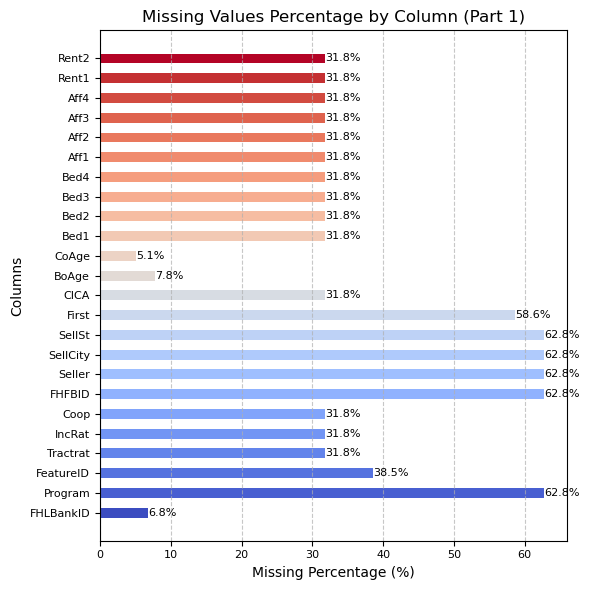

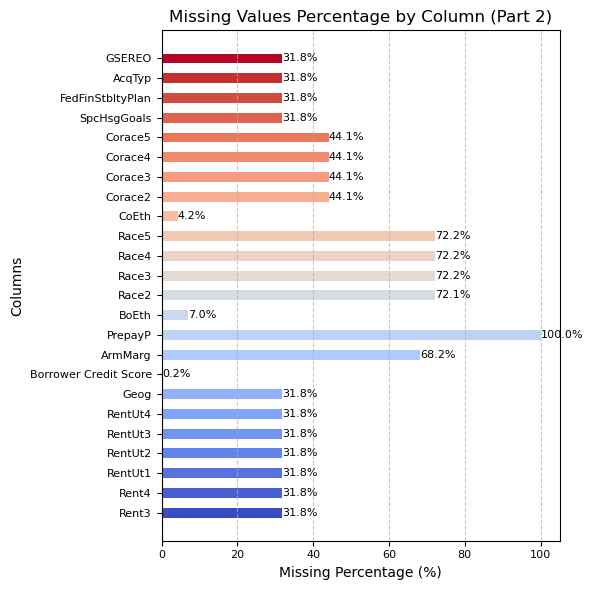

Year: 12.07% repetition (Mode: 2019)
Loan Number: 0.00% repetition (Mode: 1)
FHLBankID: 17.28% repetition (Mode: Topeka)
Program: 13.12% repetition (Mode: 6.0)
FIPSStateCode: 13.48% repetition (Mode: 39)
FIPSCountyCode: 3.73% repetition (Mode: 61)
MSA: 16.66% repetition (Mode: 99999)
FeatureID: 15.21% repetition (Mode: 9999999999.0)
Tract: 0.69% repetition (Mode: 9601.0)
MinPer: 0.57% repetition (Mode: 2.0)
TraMedY: 0.12% repetition (Mode: 73750)
LocMedY: 2.41% repetition (Mode: 54771)
Tractrat: 0.26% repetition (Mode: 1.06)
Income: 0.16% repetition (Mode: 60000)
CurAreY: 1.55% repetition (Mode: 70400)
IncRat: 0.11% repetition (Mode: 0.0001)
UPB: 0.91% repetition (Mode: 100000)
LTV: 18.23% repetition (Mode: 0.8)
MortDate: 12.49% repetition (Mode: 2019)
AcquDate: 12.07% repetition (Mode: 2019)
Purpose: 50.31% repetition (Mode: 2)
Coop: 68.17% repetition (Mode: 2.0)
Product: 100.00% repetition (Mode: 1)
FedGuar: 92.10% repetition (Mode: 0)
Term: 71.56% repetition (Mode: 360)
AmorTerm: 71

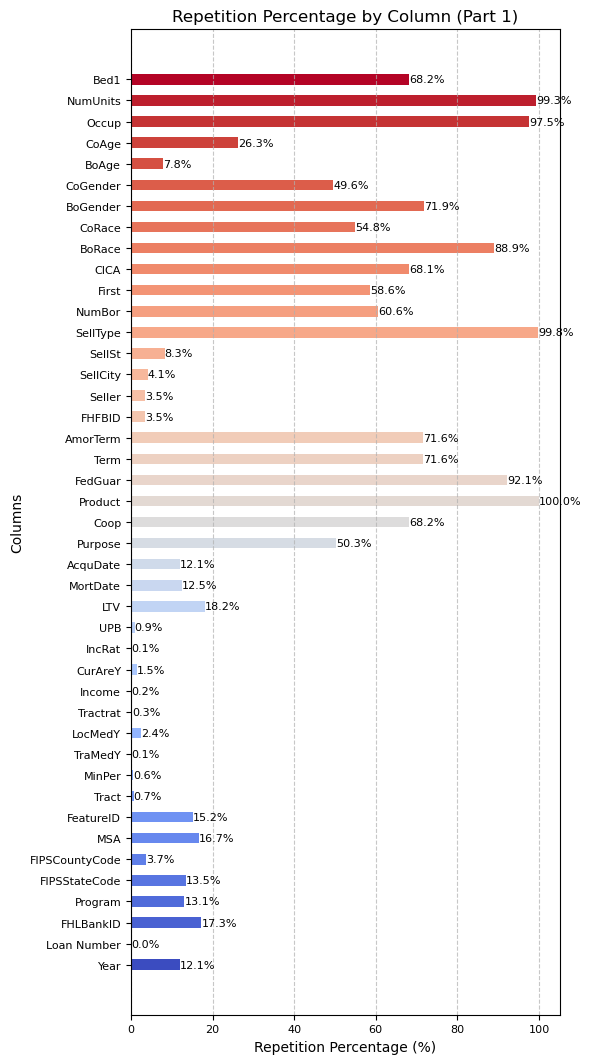

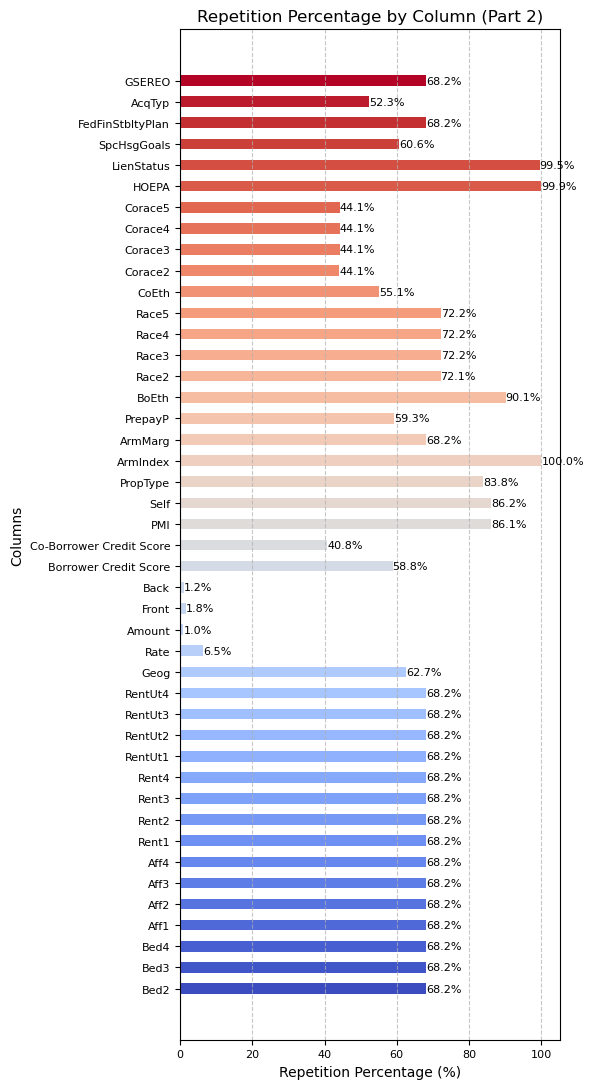

dataframe_summary.xlsx has been saved successfully.


,Column,Data Type,Unique Values,Most Common Value_x,Most Common Count,Min,Max,Mean,Std Dev,Most Common Value_y,Repetition Percentage,Missing Percentage
0,Year,int64,13,2019,89767,2009.0,2021.0,2.015711e+03,3.785652e+00,2019,12.068166,0.000000
1,Loan Number,int64,533336,1,6,1.0,2690373.0,1.456297e+06,1.118998e+06,1,0.000807,0.000000
2,FHLBankID,object,11,Topeka,128566,NaN,NaN,NaN,NaN,Topeka,17.284256,6.789427
3,Program,float64,6,6.0,97575,1.0,7.0,3.718827e+00,2.158264e+00,6.0,13.117864,62.772827
4,FIPSStateCode,int64,54,39,100232,1.0,78.0,2.891892e+01,1.299438e+01,39,13.475068,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
82,LienStatus,int64,2,1,739939,1.0,4.0,1.015705e+00,2.164921e-01,1,99.476495,0.000000
83,SpcHsgGoals,float64,2,2.0,450733,1.0,2.0,1.888897e+00,3.142600e-01,2.0,60.595994,31.830129
84,FedFinStbltyPlan,float64,1,2.0,507070,2.0,2.0,2.000000e+00,0.000000e+00,2.0,68.169871,31.830129
85,AcqTyp,float64,3,1.0,388914,1.0,4.0,1.691372e+00,1.257285e+00,1.0,52.285123,31.830129


In [32]:
df = pd.read_csv('Yearly/merged_data.csv')
df_missing = missing_percentage(df, num_subplots = 2)
df_repetition = mod_percentage(df)
df_final_summary = data_analysis(df, df_missing, df_repetition)
df_final_summary

### Analyse columns across years

In [10]:
import pandas as pd

df = pd.read_csv("Data/Cleaned_data.csv")

column_summary = []

for year in sorted(df["Year"].unique()):
    df_year = df[df["Year"] == year]

    for column in df.columns:
        if column == "Year":
            continue

        column_data = df_year[column]
        column_type = column_data.dtype
        unique_values = column_data.nunique()

        if unique_values > 0:
            most_common_value = column_data.mode().iloc[0] if not column_data.mode().empty else None
            most_common_freq = column_data[column_data == most_common_value].count()
        else:
            most_common_value, most_common_freq = None, 0

        if pd.api.types.is_numeric_dtype(column_data):
            col_min = column_data.min()
            col_max = column_data.max()
            col_mean = column_data.mean()
            col_std = column_data.std()
        else:
            col_min = col_max = col_mean = col_std = None

        column_summary.append({
            "Year": year,
            "Column": column,
            "Data Type": column_type,
            "Unique Values": unique_values,
            "Most Common Value": most_common_value,
            "Most Common Count": most_common_freq,
            "Min": col_min,
            "Max": col_max,
            "Mean": col_mean,
            "Std Dev": col_std
        })

summary_df = pd.DataFrame(column_summary)
summary_df = summary_df.sort_values(by=["Column", "Year"])
# summary_df.to_excel("yearly_column_summary.xlsx", index=False)